## ML lab 06-1: TensorFlow로 Softmax Classification의 구현하기

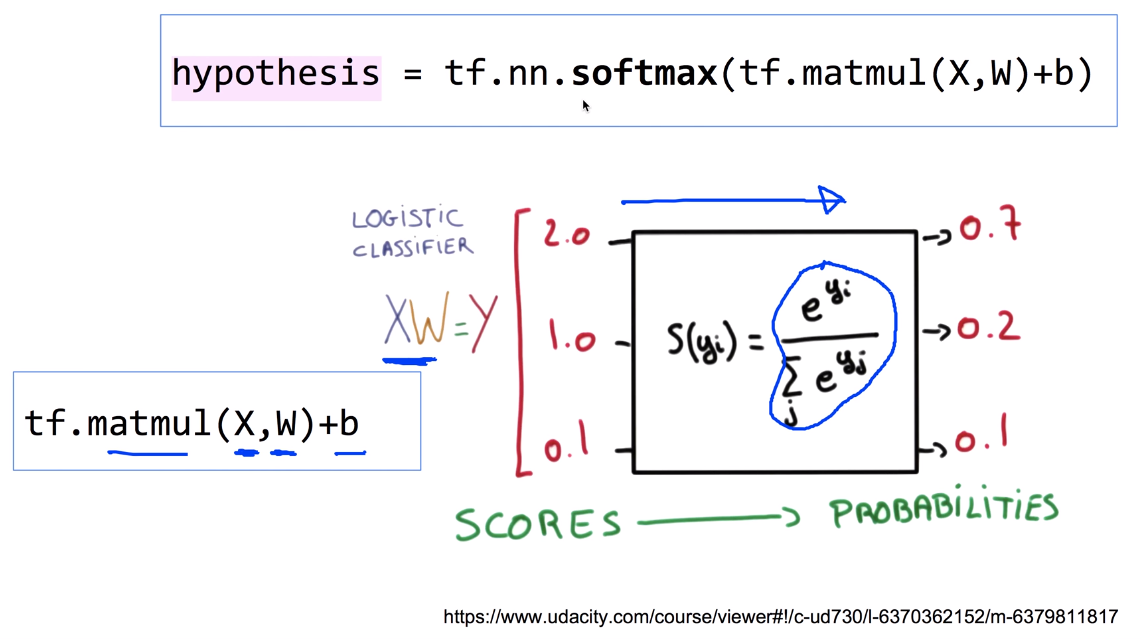
score 값을 logit이라고도 부른다. 어떤 레이블이 될 것인가에 대한 확률로 나오게 된다. 

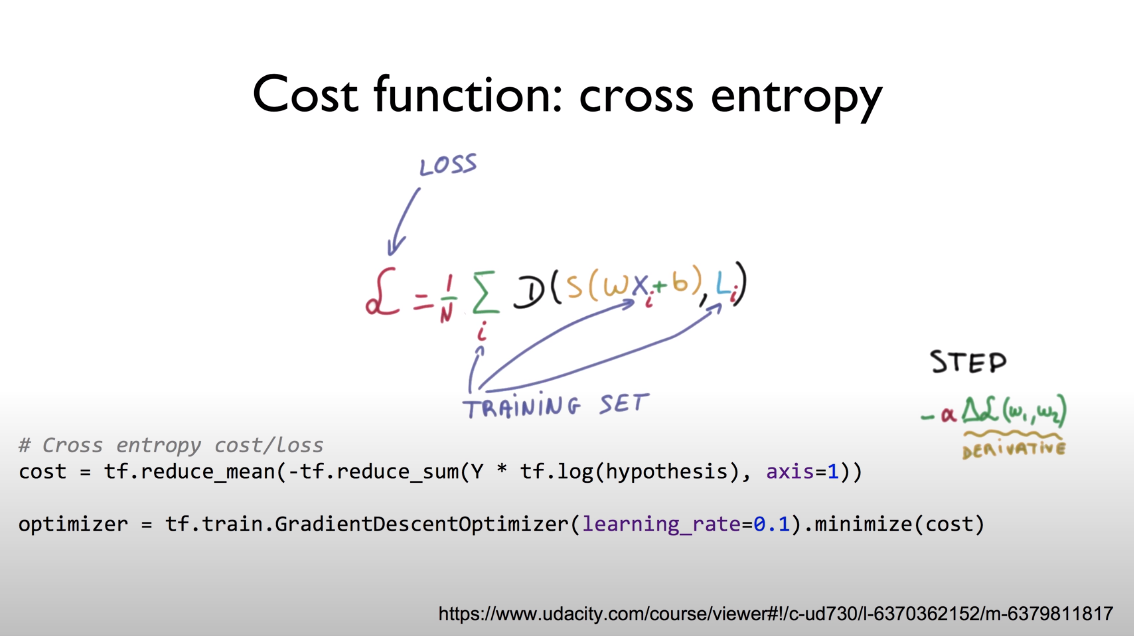
loss function 은 기본적으로 Ylog(Y(햇) 또는 hypothesis) -> 구현하는 방법은?
cost => Y * tf.log(hypothesis) -> 여러개의 matrix 하고 합을 하고, 평균을 낸다.

cost가 주어졌으면, minimize하기 -> 경사면 타고 내려가기 <p></p>
lost 함수를 미분한 값에 learning_rate 곱해서 Weight에서 빼주면 된다. 
쉽게 한줄로 GradientDescentOptimizer 함수를 사용해주면 된다. 

In [1]:
# Lab 6 Softmax Classifier
import tensorflow as tf
import numpy as np

x_raw = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_raw = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

x_data = np.array(x_raw, dtype=np.float32)
y_data = np.array(y_raw, dtype=np.float32)

nb_classes = 3

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=4, units=nb_classes, use_bias=True))  # use_bias is True, by default

# use softmax activations: softmax = exp(logits) / reduce_sum(exp(logits), dim)
tf.model.add(tf.keras.layers.Activation('softmax'))

# use loss == categorical_crossentropy
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=2000)

print('--------------')
# Testing & One-hot encoding
a = tf.model.predict(np.array([[1, 11, 7, 9]]))
print(a, tf.keras.backend.eval(tf.argmax(a, axis=1)))

print('--------------')
b = tf.model.predict(np.array([[1, 3, 4, 3]]))
print(b, tf.keras.backend.eval(tf.argmax(b, axis=1)))

print('--------------')
# or use argmax embedded method, predict_classes
c = tf.model.predict(np.array([[1, 1, 0, 1]]))
c_onehot = np.argmax(c, axis=-1)
print(c, c_onehot)

print('--------------')
all = tf.model.predict(np.array([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]))
all_onehot = np.argmax(all, axis=-1)
print(all, all_onehot)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 457ms/step - loss: 1.2347 - accuracy: 0.6250
Epoch 2/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.8980 - accuracy: 0.7500
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7821 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7940 - accuracy: 0.6250
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7642 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7791 - accuracy: 0.6250
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7562 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7731 - accuracy: 0.6250
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7516 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.7711 - accuracy: 0.6250
Epoch 11/2000
1/1 [===========

In [10]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0,0,1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.compat.v1.placeholder("float", [None, 4])
Y = tf.compat.v1.placeholder("float", [None, 3])
nob_classes = 3

W = tf.Variable(tf.compat.v1.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.compat.v1.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax acivations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.compat.v1.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.compat.v1.log(hypothesis), axis=1))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# launch graph
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y:y_data}))

0 4.117173
200 0.481294
400 0.39140865
600 0.3165666
800 0.24753368
1000 0.22180799
1200 0.20199358
1400 0.18536058
1600 0.17119157
1800 0.15897724
2000 0.14834222


one-hot : 0, 1, 2 3자리 중 하나만 자리를 핫하게(1을 만들고 아닌 자리는 0으로) 한다.
### hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
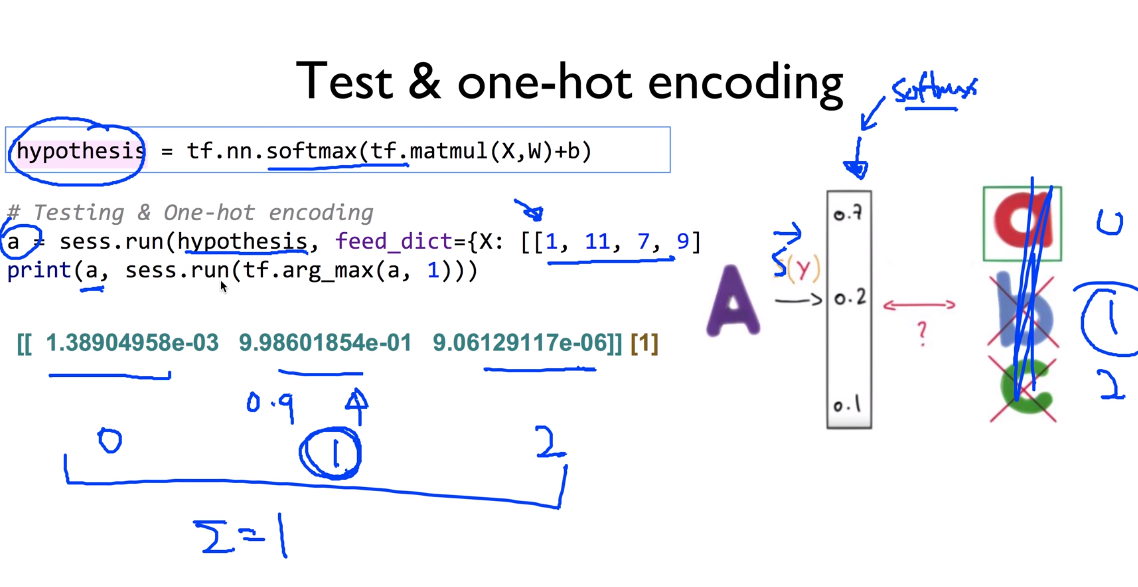
arg_max 에 array를 주면, 몇 번째에 있는 게 가장 높은지? 
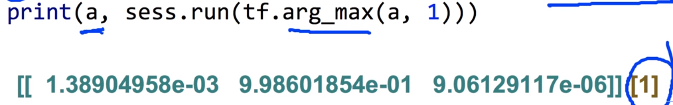

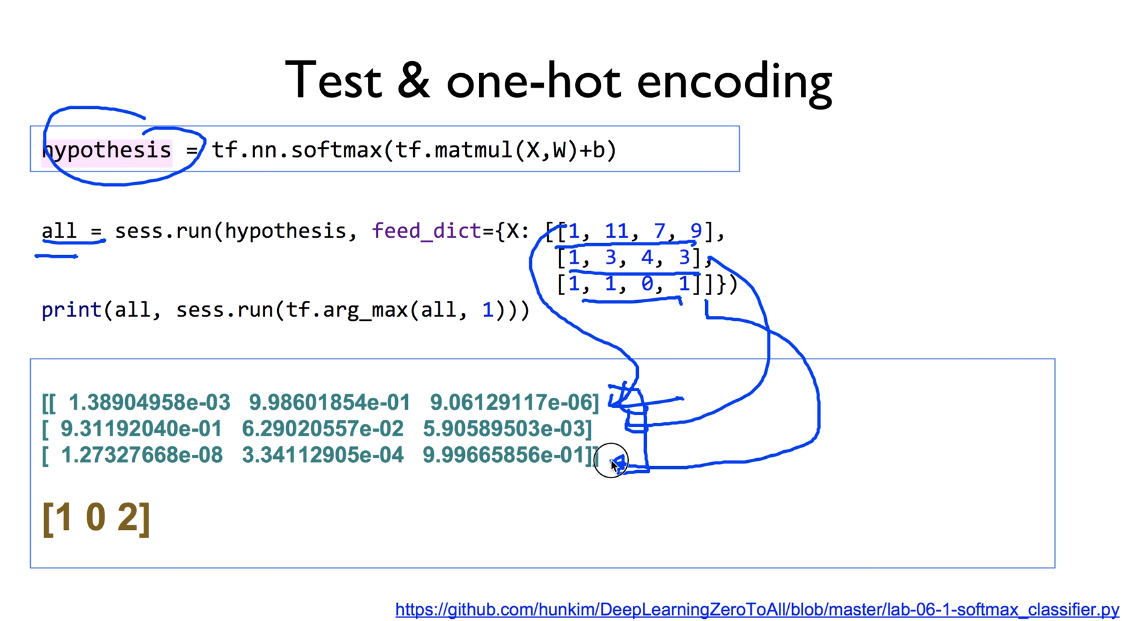
각 row에서 찾아줌

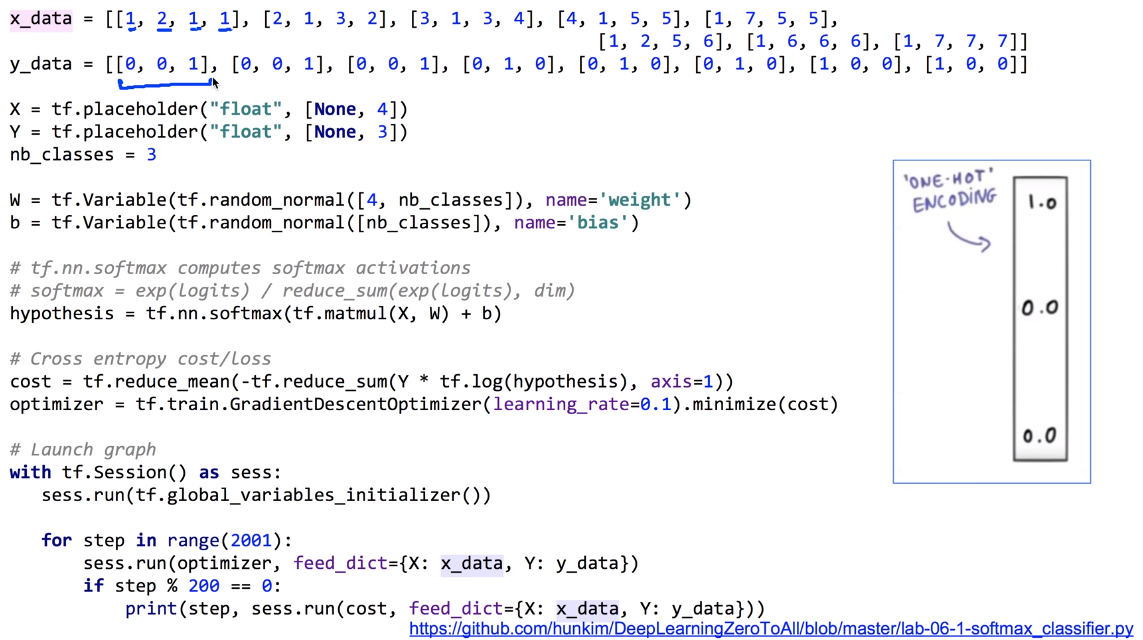
y_data가 여러개가 되면, 어떻게 표시해야 할까? => one-hot encoding 방식
하나만 뜨겁다는 것. 
<p></p>3개의 레이블을 가졌을 때, 3자리를 만들어주고 3칸 중 하나만 해당되는 곳에 hot하게 해준다.

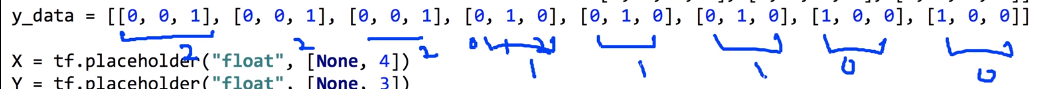
